## Examining Chatbot Tweet Data  
### British Airways' Chatbot: Investigating Date and Time Information



> ##### Breakdown of the Fields:
> tweet_id: Unique number that identifies tweet. Each tweet is a record.

> author_id: Twitter handle (individual users or company name).

> inbound: Distinguishes if a tweet is incoming to a company. "True" signifies that tweets are going **to** a company account.

> created_at: Time and date information of when the tweet came in.

> text: Raw tweet text.

> response_tweet_id: References the tweet_id that is the **response** to the current tweet record you're observing.

> in_response_to_tweet_id: References the tweet_id that **preceded** the current tweet record you're observing.

#### Foundations: Let's import libraries and store our .csv file in the form of a dataframe:

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import os
import us
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

%matplotlib inline



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Flavio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# read csv file
data = pd.read_csv('rawdata.csv')

### 1. Explore: Let's get a sense of the context, shape, and other aspects of our data:

In [3]:
# examine the first few records with the head() function
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
# examine null values
percentage_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percentage_missing})
print(missing_value_df)

                         percent_missing
tweet_id                        0.000000
author_id                       0.000000
inbound                         0.000000
created_at                      0.000000
text                            0.000000
response_tweet_id              32.857354
in_response_to_tweet_id        25.732442


> Here, we see that two of our columns are 32% and 25% **null values!** Well:
> + In the 'response_tweet_id' field, null values might represent **when Twitter conversations ended**. 
> + In the 'in_response_to_tweet_id' field, null values might represent **when Twitter conversations started**.

In [5]:
# examine duplicates

isdupe = data.duplicated()
isdupe.value_counts()

dupelist = data['text'][data['text'].duplicated(keep=False)]
print(dupelist.head(5))

130             @ATVIAssist Thanks
655           @VirginTrains Thanks
1475    I love you @ChipotleTweets
1525    @VerizonSupport Yes it is.
1927          @AppleSupport 11.0.3
Name: text, dtype: object


> There are **0** duplicates in the tweet_id field, **197** duplicates in the 'text' field, **17,786** in 'response_tweet_id', and **17,724** in 'in_response_to_tweet_id.' 
> + Duplicates in the latter two columns may be explained by **messages** which are **delivered in parts**, which can result in three tweet records all responding as (or in response to) the same unique ID. For example, 1/3: This is 2/3: an example 3/3: of what I mean. 
> + Duplicates in the 'text_id' field might be explained by **common responses** like 'Thanks' and 'Yes', and recycled company responses like 'We're so sorry for the inconvenience.' 

> Let's normalize the date and time field like so:

In [3]:
# normalize "created_at" field
data['as_datetime'] = pd.to_datetime(data['created_at'], format = '%a %b %d %H:%M:%S %z %Y')
data['as_datetime']

0       2017-10-31 22:10:47+00:00
1       2017-10-31 22:11:45+00:00
2       2017-10-31 22:08:27+00:00
3       2017-10-31 21:54:49+00:00
4       2017-10-31 21:49:35+00:00
                   ...           
54129   2017-11-30 08:21:07+00:00
54130   2017-11-30 08:16:44+00:00
54131   2017-11-30 08:13:05+00:00
54132   2017-11-30 07:58:39+00:00
54133   2017-11-30 07:52:34+00:00
Name: as_datetime, Length: 54134, dtype: datetime64[ns, UTC]

### 2. Analyze: What does this data tell us?

In [ ]:
# set date equal to the dataframe index (to help with creating visualizations)
data = data.set_index(['as_datetime'])

#### Count of Tweets, Broken Down by Year:

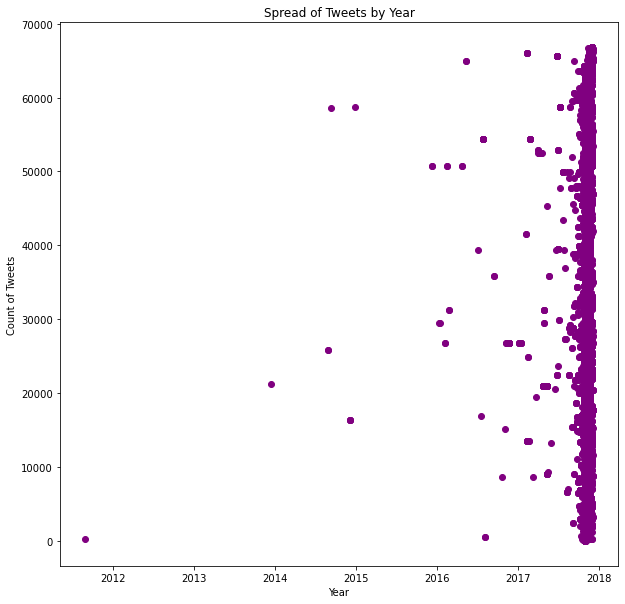

In [20]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(data.index.values,
        data['tweet_id'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Count of Tweets",
       title="Spread of Tweets by Year")

plt.show()

> #### We can see above that this data has an unusual spread: more than 50% of our tweets are recorded on one day: November 11, 2017. Then, we have a clear outlier in 2012. I would also consider how little data there is from 2013-2016.

> With > 70% of this dataset occurring over two days, I don't see weekly, monthly, or yearly analyses being very helpful here. Let's examine this dataset at the hourly level. 


### Aggregate tweets sent before 2017, broken down by hours in a day:

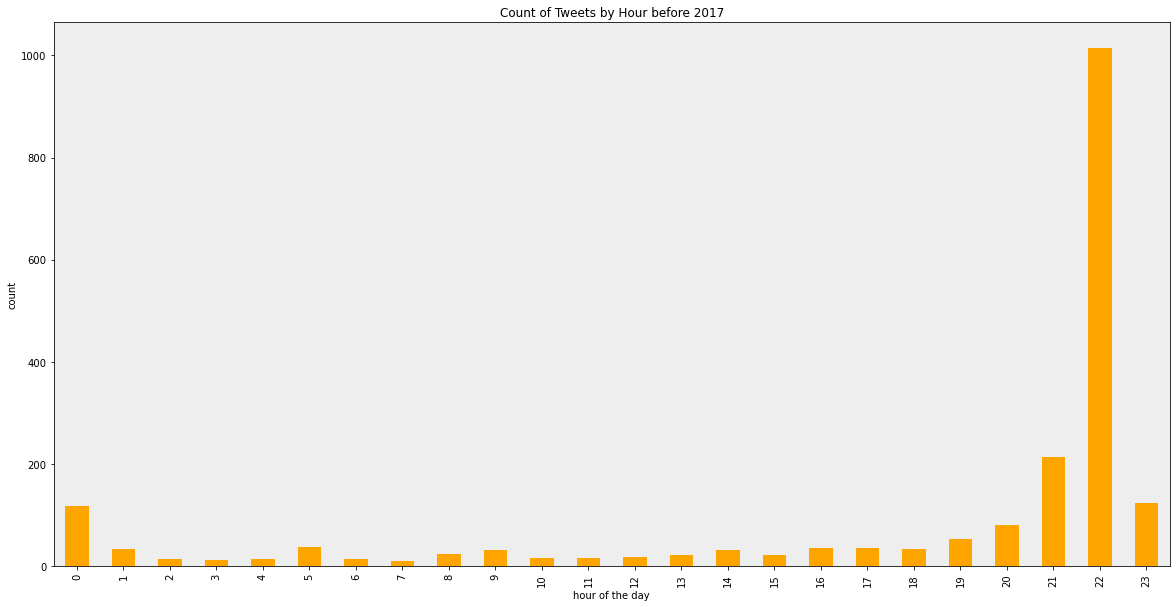

In [25]:
#graph
data['datetime_before_2017'] = data['as_datetime'].loc[:2016]

plt.figure(figsize=(20, 10))
ax = (data['datetime_before_2017'].groupby(data['as_datetime'].dt.hour)
                         .count()).plot(kind="bar", color='orange')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("count")
ax.set_title('Count of Tweets by Hour before 2017')
plt.show()

> Here, we see that the tweets captured before 2017 overwhelmingly occur at 11 P.M. In fact, these tweets add a whole 1000 tweets to this hour. If we chose to include this data in our analysis, we would get inflated activity around 11 P.M.

Below, I have plotted tweets only from 2017: 

### Aggregate tweets sent in 2017, broken down by hours in a day:

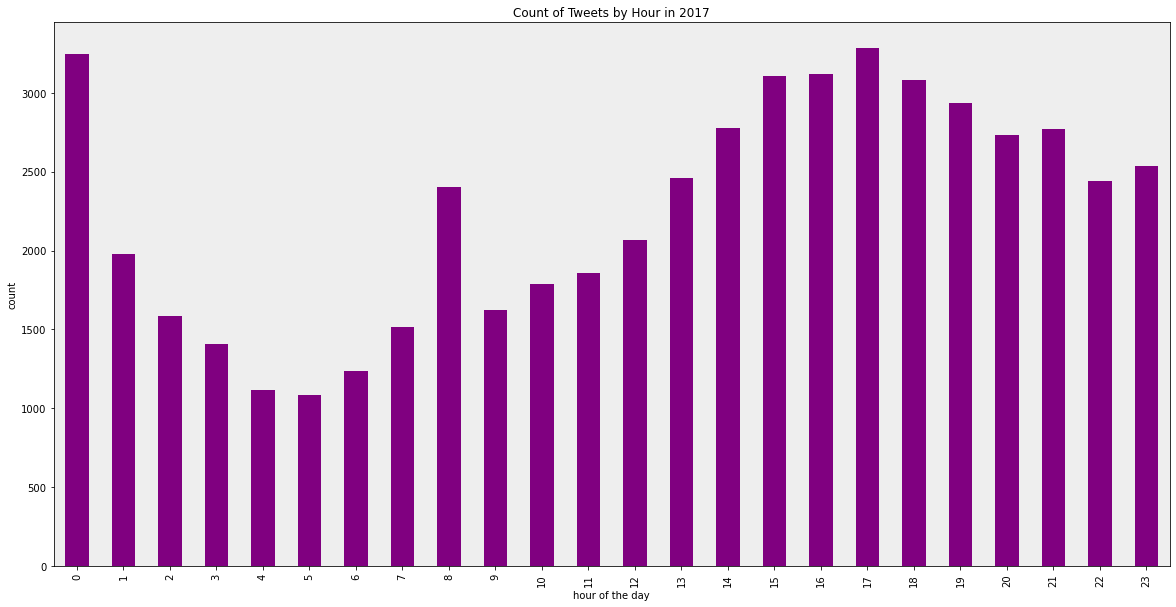

In [18]:
#graph
data['datetime_on_2017'] = data['as_datetime'].loc[2017]

plt.figure(figsize=(20, 10))
ax = (data['datetime_on_2017'].groupby(data['as_datetime'].dt.hour)
                         .count()).plot(kind="bar", color='purple')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("count")
ax.set_title('Count of Tweets by Hour in 2017')
plt.show()

> We see a wave shape, dipping around 4-5 A.M. and peaking at around 5 P.M. While tweets drop from midnight to 5 A.M. by >2000 tweets per hour, they drop again after 5 P.M. at a much smaller pace - indicating that tweet activity is generally greater in the last 12 hours of the day, rather than the first. This could be the nature of people working in the first half of the day and not working in the last half.
> Importantly, 8 A.M. had an unusually high amount of tweet activity - here, we see about 1000 more tweets than both 7 and 9 A.M.

> **Takeaways:**

> There may be a spike in tweet activity around 8 A.M., when people begin their workdays.

> Tweet activity may be lowest in the early hours of the day (1 - 6 A.M.) and roughly increase onwards until after 5 P.M. (exempting an 8 A.M. spike). Important to note: the majority of this data was captured on Halloween day (a Tuesday). I wonder: Perhaps tweet activity is condensed into working hours on Halloween when normally, it might take place **after** work? We would need to see tweet activity on other days to assess the difference.

> Because the majority of this data is taken from Halloween, I would re-examine the midnight spike. 

### Aggregate Tweets Broken Down by Company:

Text(0.5, 1.0, 'Top Five Companies by Number of Tweets')

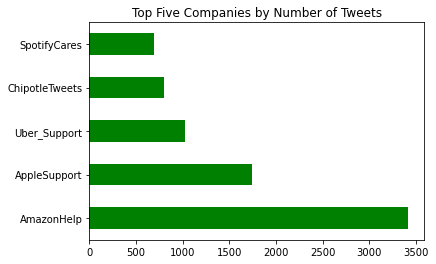

In [6]:
# bar chart form
data['author_id'].value_counts()[:5].plot(kind='barh', x=data['as_datetime'], color='green')
plt.title('Top Five Companies by Number of Tweets')

Text(0, 0.5, '')

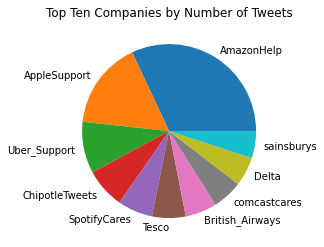

In [40]:
# count companies by number of tweet
data['author_id'].value_counts()[:10].plot(kind='pie', x=data['as_datetime'])
plt.title('Top Ten Companies by Number of Tweets')
plt.ylabel('')

### Let's examine the airline industry:

> We see that British Airways receives/responds to the most tweets, followed by Delta, Southwest Air, and AmericanAir. 

#### British Airway's tweets, broken down by hours in a day:

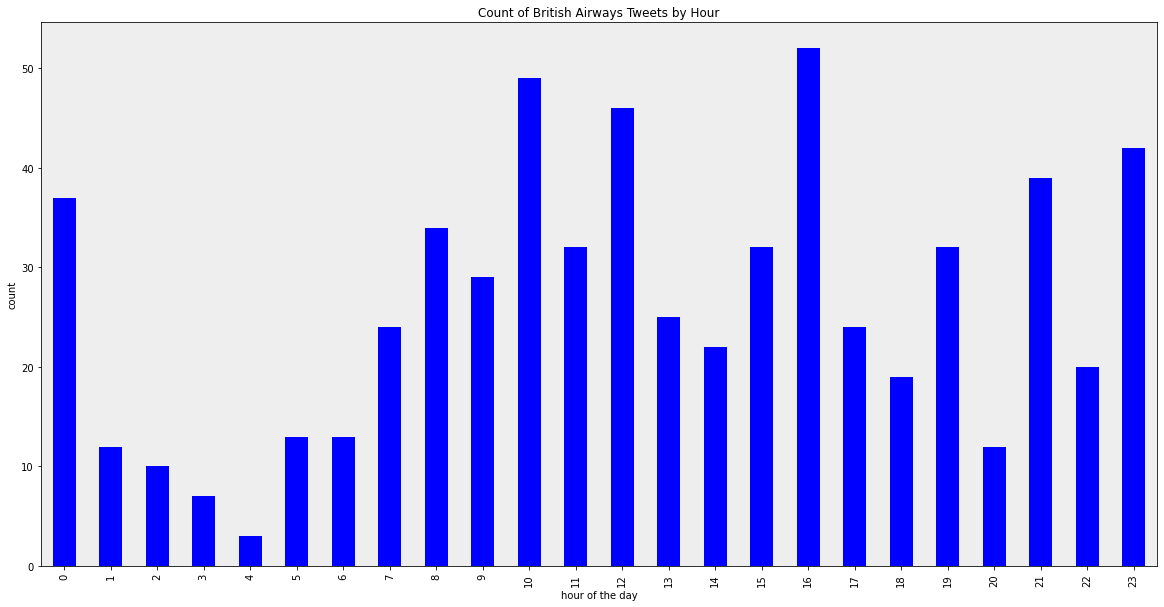

In [4]:
# count of British Airways tweets broken down by hours in a day
british_airwaysData = data[data['author_id']=='British_Airways']

plt.figure(figsize=(20, 10))
ax = (british_airwaysData['author_id'].groupby(british_airwaysData['as_datetime'].dt.hour)
                         .count()).plot(kind="bar", color='blue')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("count")
ax.set_title('Count of British Airways Tweets by Hour')
plt.show()

**Takeaways:**

> All of the British Airways data is "outbound" - meaning, British Airway's tweets do not include customer responses, *only* British Airway's responding tweets. As such, we cannot break this down to assess customer usage patterns directly.

> British Airways' activity spikes five times: at 10 A.M., noon, 4 P.M. (the hour with the greatest activity), 9 P.M., and 11 P.M. British Airways' data tends to spike.

>> Perhaps British Airways receives more tweets at lunch time, contributing to the spikes at 10 A.M. and noon. While it also sees more activity at 8 A.M. (echoing the aggregate data), British Airways responds far more often around lunchtime.

>> Similarly, perhaps British Airways receives the most requests just before the work day is over (4 P.M.). Maybe users want to resolve their issues before they leave work, or before they move on to focus on Halloween festivities.

> Activity was most reliable from 7 A.M. to 5 P.M. Off-work hours spike and dip, with a notable spike from 11 P.M. to midnight. Maybe late-night tweets are related to the pressure of taking flights 

In [8]:
# code shows that all of British Airways data is "outbound"

#data[(data['author_id']=='British_Airways') & (data['inbound']==False)].count

#data[data['author_id']=='British_Airways'].count

### British Airways' Hourly Conversation Rate:

In [5]:
#remove leading and trailing spaces from text
data['author_id'] = data['author_id'].str.replace(r'\s+', ' ', regex=True)
data['text'] = data['text'].str.replace(r'\s+', ' ', regex=True)

In [52]:
# find unique hour + username combinations
british_airwaysData['username'] = british_airwaysData['text'].str.split(' ').str.get(0)
british_airwaysData['datehour'] = british_airwaysData['as_datetime'].dt.hour
british_airwaysData_uniques = british_airwaysData[['datehour','username']]
british_airwaysData_uniques.drop_duplicates(inplace=True)
british_airwaysData_uniques.count()

C:\Users\Flavio\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


datehour    541
username    541
dtype: int64

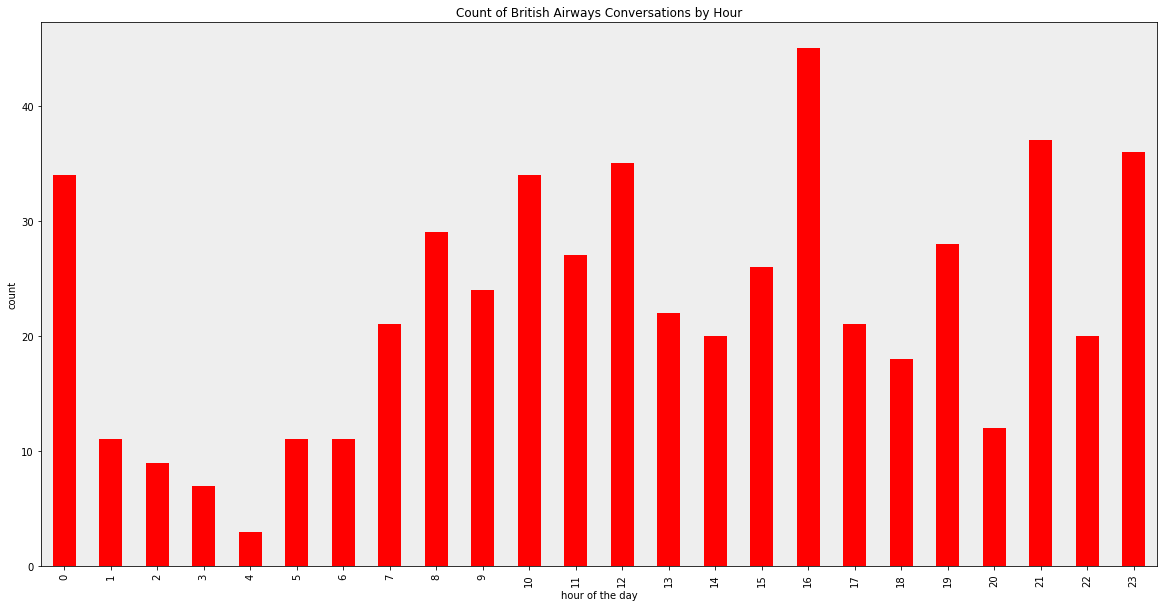

In [54]:
#graph
plt.figure(figsize=(20, 10))
ax = (british_airwaysData_uniques['username'].groupby(british_airwaysData_uniques['datehour'])
                         .count()).plot(kind="bar", color='red')
ax.set_facecolor('#eeeeee')
ax.set_xlabel("hour of the day")
ax.set_ylabel("count")
ax.set_title('Count of British Airways Conversations by Hour')
plt.show()

Here, unique customer usernames are acting as the proxy for a "conversation." This graph shows what hours that unique conversations were taking place. In essence:

If a conversation with Customer A took place over two hours, then both of those hours are recorded separately here.

If several tweets went out to Customer A in one single hour, then only one of those tweets is recorded.

> Interestingly, the number of unique "conversations" (541) is not very different from the number of total tweets (628). This might suggest that conversations with customers 1. take place over hours or 2. begin near the start of a new hour (a fault of the model). 
> When examining the conversations, I notice that people *start* conversations at 8 or 9 A.M., but they return to those same conversations later, often times late at night (resulting in the 5 and 10 P.M. spikes). In addition, conversations frequently span multiple days. All of this suggests that customers begin interacting with the chatbot, take a substantial break, and come back later to continue. Further analysis could be done to see if certain expressions or requests from the chatbot are correlated with these breaks.